In [1]:
import os
import sys
import io
import numpy as np
import pandas as pd
import geopandas as gpd
import urllib
from matplotlib import pyplot as plt
from fiona.crs import from_epsg
import requests

%matplotlib inline

## BBL
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh


In [2]:
if not os.path.isfile("data/BBL.gz"):
    url = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "BBL.gz")
    !mv BBL.gz data
    !unzip -o data/BBL.gz -d data/BBL
else:
    print("file in place, you can continue")

file in place, you can continue


In [3]:
filename = ! ls data/BBL | grep .shp
BBL = gpd.GeoDataFrame.from_file('data/BBL/' + filename[1])
BBL['borough'] = BBL['base_bbl'].apply(lambda x: x[0])
BBL = BBL[BBL['borough'] == '1'].reset_index(drop=True)
print(BBL.shape)
BBL.head()

(45590, 17)


,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry,borough
0,1008870001,1018457.0,1935.0,584238.0,2100.0,Photogramm,37.0,155.490000,2017-08-22,00:00:00.000,Constructed,1008870001,None,4594.256246,347.419155,"POLYGON ((-73.98236677504677 40.7452378978967,...",1
1,1013490035,1039988.0,1931.0,66240.0,2100.0,Photogramm,52.0,167.214468,2017-08-22,00:00:00.000,Constructed,1013490035,None,4652.202721,302.585551,POLYGON ((-73.96425191767109 40.75860443341254...,1
2,1021210037,1062896.0,1910.0,708881.0,2100.0,Photogramm,154.0,59.722628,2017-08-22,00:00:00.000,Constructed,1021210037,None,2245.290397,237.134669,POLYGON ((-73.93870129348369 40.83782255082231...,1
3,1017730020,1087605.0,1998.0,869430.0,2100.0,Photogramm,18.0,47.625370,2017-08-22,00:00:00.000,Constructed,1017730020,None,63339.404067,1433.365195,POLYGON ((-73.93631082260336 40.80331094790955...,1
4,1005040036,1007814.0,1920.0,263088.0,2100.0,Photogramm,19.0,74.860000,2017-08-22,00:00:00.000,Constructed,1005040036,None,4988.414472,289.193571,POLYGON ((-74.00326692427507 40.72554497463773...,1


### Centroid
http://geopandas.org/geometric_manipulations.html

In [4]:
BBL_centroid = BBL.centroid
print(type(BBL_centroid))
BBL_centroid.head()

<class 'geopandas.geoseries.GeoSeries'>


0    POINT (-73.98229843676347 40.74516612681754)
1    POINT (-73.96406436978496 40.75855931937615)
2    POINT (-73.93879280910893 40.83781306769427)
3    POINT (-73.93689812983716 40.80373344067873)
4    POINT (-74.00328854412179 40.72566918505449)
dtype: object

In [5]:
BBL_centroid_gpd = gpd.GeoDataFrame(BBL_centroid)
BBL_centroid_gpd.columns = ['geometry']

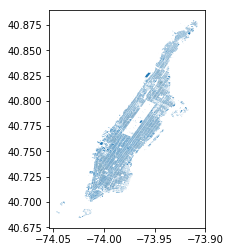

In [6]:
BBL.plot()

### Buffer
http://geopandas.org/reference.html  
https://my.oschina.net/u/2254515/blog/420003

buffer distance: 1/4 mile

In [7]:
BBL_centroid_buffer = BBL_centroid.geometry.apply(lambda x: x.buffer(distance=0.004))

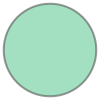

In [8]:
BBL_centroid_buffer[1]

In [9]:
BBL_centroid_buffer_gpd = gpd.GeoDataFrame(BBL_centroid_buffer)
BBL_centroid_buffer_gpd.columns = ['geometry']

## Census tracts

In [10]:
if not os.path.isfile("data/Census_Tracts_2010.gz"):
    # https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyct2010_19a.zip
    url = 'https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "Census_Tracts_2010.gz")
    !mv Census_Tracts_2010.gz data
    !unzip -o data/Census_Tracts_2010.gz -d data/Census_Tracts_2010
else:
    print("file in place, you can continue")

file in place, you can continue


In [11]:
filename = ! ls data/Census_Tracts_2010 | grep .shp
CensusTracts = gpd.GeoDataFrame.from_file('data/Census_Tracts_2010/' + filename[0])
CensusTracts = CensusTracts[CensusTracts['boro_name']=='Manhattan']
print(CensusTracts.shape)
CensusTracts.head()

(288, 12)


,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98411754823195 40.7548420534646,..."


### unary_union

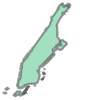

In [12]:
# unary_union
# http://geopandas.org/geometric_manipulations.html
CensusTracts_union = CensusTracts.unary_union
CensusTracts_union

### buffer of census tract
http://geopandas.org/reference.html  
https://my.oschina.net/u/2254515/blog/420003

buffer distance: 1/4 mile

In [13]:
CensusTracts_buffer = CensusTracts.geometry.apply(lambda x: x.buffer(distance=0.004))

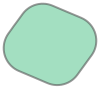

In [14]:
CensusTracts_buffer[1]

## Census Data

In [15]:
if not os.path.isfile("data/nyc_census_tracts.csv"):
    ! curl https://raw.githubusercontent.com/JunjieTsai/MLC2019_Project/master/data/nyc_census_tracts.csv > data/nyc_census_tracts.csv
else:
    print("file in place, you can continue")

file in place, you can continue


In [16]:
census_tracts_data = pd.read_csv("data/nyc_census_tracts.csv")
census_tracts_data = census_tracts_data[census_tracts_data['Borough']=='Manhattan']
census_tracts_data['CensusTract'] = census_tracts_data['CensusTract'].astype(str)
census_tracts_data['ct2010'] = census_tracts_data['CensusTract'].apply(lambda x: x[5:])
print(census_tracts_data.shape)
census_tracts_data.head()

(288, 37)


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ct2010
1100,36061000100,New York,Manhattan,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,000100
1101,36061000201,New York,Manhattan,2791,1301,1490,35.3,12.4,6.2,0.0,...,6.3,1.7,33.0,1105,90.1,7.1,2.8,0.0,2.6,000201
1102,36061000202,New York,Manhattan,7768,3314,4454,36.8,17.6,12.8,0.0,...,9.1,7.0,30.9,2667,74.1,19.8,6.1,0.0,15.1,000202
1103,36061000500,New York,Manhattan,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,000500
1104,36061000600,New York,Manhattan,12554,5966,6588,33.2,3.4,12.0,0.4,...,5.1,2.9,30.3,4028,85.0,10.2,4.8,0.0,8.7,000600


In [17]:
CensusTracts = pd.merge(CensusTracts, census_tracts_data, left_on='ct2010', right_on='ct2010', how='outer')
print(CensusTracts.shape)
CensusTracts.head()

(288, 48)


,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,42.9,3.7,6.0,24.6,5213,86.8,5.8,7.4,0.0,2.9
1,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,...,42.4,3.8,3.8,24.9,1224,91.8,4.0,4.2,0.0,3.6
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,21.6,24.1,27.8,15.2,162,67.9,3.1,29.0,0.0,0.0
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,...,31.2,8.1,15.9,28.7,572,82.7,8.6,8.7,0.0,6.2
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,...,51.9,0.0,3.7,17.9,108,95.4,4.6,0.0,0.0,0.0


### Map census tract to BBL

In [18]:
CT_BBL = gpd.sjoin(BBL_centroid_gpd, CensusTracts, how='left')
CT_BBL = pd.DataFrame(CT_BBL).drop(['geometry', 'index_right'], axis=1)
print(CT_BBL.shape)
CT_BBL.head()

/nfshome/jc9033/.conda/envs/py3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


(45590, 47)


,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1,1007200,Manhattan,I,007200,72,MN20,Murray Hill-Kips Bay,3808,1.877429e+06,...,36.8,2.3,6.8,25.0,5333.0,91.9,5.8,2.3,0.0,6.7
1,1,1010800,Manhattan,I,010800,108,MN19,Turtle Bay-East Midtown,3808,1.950021e+06,...,30.2,2.8,9.6,26.9,5760.0,85.4,6.0,8.6,0.0,4.0
2,1,1024301,Manhattan,E,024301,243.01,MN36,Washington Heights South,3801,1.132080e+06,...,5.8,2.8,9.3,41.3,1777.0,73.4,12.9,11.4,2.3,18.4
3,1,1019600,Manhattan,I,019600,196,MN34,East Harlem North,3804,1.902091e+06,...,7.3,3.1,5.2,35.6,1640.0,84.3,12.4,3.3,0.0,9.2
4,1,1004900,Manhattan,I,004900,49,MN24,SoHo-TriBeCa-Civic Center-Little Italy,3810,2.226124e+06,...,22.9,13.2,9.2,22.9,2980.0,81.9,5.2,12.9,0.0,5.0


In [19]:
df = BBL.copy()
df = pd.merge(df, CT_BBL, left_index=True, right_index=True)
print(df.shape)
df.head()

(45590, 64)


,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1008870001,1018457.0,1935.0,584238.0,2100.0,Photogramm,37.0,155.490000,2017-08-22,00:00:00.000,...,36.8,2.3,6.8,25.0,5333.0,91.9,5.8,2.3,0.0,6.7
1,1013490035,1039988.0,1931.0,66240.0,2100.0,Photogramm,52.0,167.214468,2017-08-22,00:00:00.000,...,30.2,2.8,9.6,26.9,5760.0,85.4,6.0,8.6,0.0,4.0
2,1021210037,1062896.0,1910.0,708881.0,2100.0,Photogramm,154.0,59.722628,2017-08-22,00:00:00.000,...,5.8,2.8,9.3,41.3,1777.0,73.4,12.9,11.4,2.3,18.4
3,1017730020,1087605.0,1998.0,869430.0,2100.0,Photogramm,18.0,47.625370,2017-08-22,00:00:00.000,...,7.3,3.1,5.2,35.6,1640.0,84.3,12.4,3.3,0.0,9.2
4,1005040036,1007814.0,1920.0,263088.0,2100.0,Photogramm,19.0,74.860000,2017-08-22,00:00:00.000,...,22.9,13.2,9.2,22.9,2980.0,81.9,5.2,12.9,0.0,5.0


## Subway

In [20]:
if not os.path.isfile("data/subway.gz"):
    url = 'https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "subway.gz")
    !mv subway.gz data
    !unzip -o data/subway.gz -d data/subway
else:
    print("file in place, you can continue")

file in place, you can continue


In [21]:
filename = ! ls data/subway | grep .shp
subway = gpd.GeoDataFrame.from_file('data/subway/' + filename[0])
print(subway.shape)
subway.head()

(1928, 5)


,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734.0,http://web.mta.info/nyct/service/,POINT (-73.86835600032798 40.84916900104506)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735.0,http://web.mta.info/nyct/service/,POINT (-73.86821300022677 40.84912800131844)
2,2-5,Morris Park Ave & 180th St at NW corner,1736.0,http://web.mta.info/nyct/service/,POINT (-73.87349900050798 40.84122300105249)
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-73.87289199978331 40.84145300067447)
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-73.87962300013866 40.84081500075867)


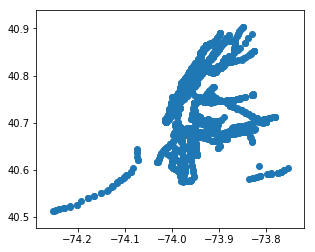

In [22]:
subway.plot()

### find the nearest point
https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html  
the first item is the geometry of our origin point and the second item (at index 1) is the actual nearest geometry from the destination points. 

In [23]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
subway_MultiPoints = MultiPoint(subway.geometry)

In [24]:
def nearest_point_distance(point, MultiPoints):
    nearest_point = nearest_points(point, MultiPoints)[1]
    return point.distance(nearest_point)

In [25]:
df['distance_subway'] = BBL_centroid.apply(nearest_point_distance, MultiPoints=subway_MultiPoints)
print(df.shape)
df.head()

(45590, 65)


,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,distance_subway
0,1008870001,1018457.0,1935.0,584238.0,2100.0,Photogramm,37.0,155.490000,2017-08-22,00:00:00.000,...,2.3,6.8,25.0,5333.0,91.9,5.8,2.3,0.0,6.7,0.000431
1,1013490035,1039988.0,1931.0,66240.0,2100.0,Photogramm,52.0,167.214468,2017-08-22,00:00:00.000,...,2.8,9.6,26.9,5760.0,85.4,6.0,8.6,0.0,4.0,0.003997
2,1021210037,1062896.0,1910.0,708881.0,2100.0,Photogramm,154.0,59.722628,2017-08-22,00:00:00.000,...,2.8,9.3,41.3,1777.0,73.4,12.9,11.4,2.3,18.4,0.002309
3,1017730020,1087605.0,1998.0,869430.0,2100.0,Photogramm,18.0,47.625370,2017-08-22,00:00:00.000,...,3.1,5.2,35.6,1640.0,84.3,12.4,3.3,0.0,9.2,0.000695
4,1005040036,1007814.0,1920.0,263088.0,2100.0,Photogramm,19.0,74.860000,2017-08-22,00:00:00.000,...,13.2,9.2,22.9,2980.0,81.9,5.2,12.9,0.0,5.0,0.000466


## bus station

In [26]:
if not os.path.isfile("data/bus.csv"):
    ! curl https://raw.githubusercontent.com/JunjieTsai/MLC2019_Project/master/data/bus_stop.csv > data/bus.csv
else:
    print("file in place, you can continue")

file in place, you can continue


In [27]:
bus = pd.read_csv("data/bus.csv")
# https://anitagraser.com/2019/01/23/from-csv-to-geodataframe-in-two-lines/
bus = gpd.GeoDataFrame(bus, geometry=[Point(xy) for xy in zip(bus.stop_lon, bus.stop_lat)])
print(bus.shape)
bus.head()

(16231, 7)


,Unnamed: 0,stop_id,stop_lat,stop_lon,stop_name,lonlat,geometry
0,0,300000,40.578350,-73.940029,ORIENTAL BL/MACKENZIE ST,"(-73.94002900000001, 40.57835)",POINT (-73.94002900000002 40.57835)
1,1,300002,40.578066,-73.943029,ORIENTAL BL/JAFFRAY ST,"(-73.94302900000001, 40.578066)",POINT (-73.94302900000002 40.578066)
2,2,300003,40.577909,-73.944643,ORIENTAL BL/HASTINGS ST,"(-73.944643, 40.577909000000005)",POINT (-73.944643 40.57790900000001)
3,3,300004,40.577718,-73.946200,ORIENTAL BL/FALMOUTH ST,"(-73.9462, 40.577718)",POINT (-73.9462 40.577718)
4,4,300006,40.577353,-73.949552,ORIENTAL BL/DOVER ST,"(-73.949552, 40.577353)",POINT (-73.949552 40.577353)


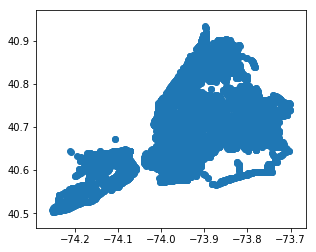

In [28]:
bus.plot()

In [29]:
bus_MultiPoints = MultiPoint(bus.geometry)

In [30]:
df['distance_bus'] = BBL_centroid.apply(nearest_point_distance, MultiPoints=bus_MultiPoints)
print(df.shape)
df.head()

(45590, 66)


,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,distance_subway,distance_bus
0,1008870001,1018457.0,1935.0,584238.0,2100.0,Photogramm,37.0,155.490000,2017-08-22,00:00:00.000,...,6.8,25.0,5333.0,91.9,5.8,2.3,0.0,6.7,0.000431,0.001354
1,1013490035,1039988.0,1931.0,66240.0,2100.0,Photogramm,52.0,167.214468,2017-08-22,00:00:00.000,...,9.6,26.9,5760.0,85.4,6.0,8.6,0.0,4.0,0.003997,0.000763
2,1021210037,1062896.0,1910.0,708881.0,2100.0,Photogramm,154.0,59.722628,2017-08-22,00:00:00.000,...,9.3,41.3,1777.0,73.4,12.9,11.4,2.3,18.4,0.002309,0.000256
3,1017730020,1087605.0,1998.0,869430.0,2100.0,Photogramm,18.0,47.625370,2017-08-22,00:00:00.000,...,5.2,35.6,1640.0,84.3,12.4,3.3,0.0,9.2,0.000695,0.000475
4,1005040036,1007814.0,1920.0,263088.0,2100.0,Photogramm,19.0,74.860000,2017-08-22,00:00:00.000,...,9.2,22.9,2980.0,81.9,5.2,12.9,0.0,5.0,0.000466,0.000588


## Park

In [31]:
if not os.path.isfile("data/parks.gz"):
    url = 'https://data.cityofnewyork.us/api/geospatial/k2ya-ucmv?method=export&format=Shapefile'
    urllib.request.urlretrieve(url, "parks.gz")
    !mv parks.gz data
    !unzip -o data/parks.gz -d data/parks
else:
    print("file in place, you can continue")

file in place, you can continue


In [32]:
filename = ! ls data/parks | grep .shp
parks = gpd.GeoDataFrame.from_file('data/parks/' + filename[0])
parks = parks[parks['borough'] == 'M']
print(parks.shape)
parks.head()

(384, 36)


,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19440801000000.00000,0.991,None,M,PLGD,20100106000000.00000,111,9,M-11,Abraham Lincoln Playground,...,25,False,Abraham Lincoln Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/M193/,13,No,10037,POLYGON ((-73.93682693707335 40.81184552631012...
13,20021120000000.00000,0.110,335 EAST 108 STREET,M,PARK,20100106000000.00000,111,8,M-11,Humacao Community Garden,...,23,False,Humacao Community Garden,Greenthumb,Garden,http://www.nycgovparks.org/parks/M344/,13,No,10029,"POLYGON ((-73.9393568469474 40.79144347341266,..."
15,19060110000000.00000,0.340,None,M,PARK,20100106000000.00000,109,7,M-09,Montefiore SquarePark,...,30,False,Montefiore Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/M055/,13,No,10031,"POLYGON ((-73.953952321884 40.82122637435634, ..."
18,19971219000000.00000,0.118,128 WEST 139 STREET,M,PLGD,20100106000000.00000,110,9,M-10,Abyssinian Tot Lot,...,32,False,Abyssinian Tot Lot,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/M303/,13,No,10030,"POLYGON ((-73.9406885465869 40.81726604067758,..."
27,19061010000000.00000,3.900,294 10 Av,M,PARK,20100106000000.00000,104,3,M-04,Chelsea Park,...,10,False,Chelsea Park,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/M011/,10,No,10001,POLYGON ((-74.00177474199378 40.75069828559118...


Point in Polygon
https://automating-gis-processes.github.io/2016/Lesson3-point-in-polygon.html

park_Manhattan_list = pd.DataFrame(parks.geometry.within(CensusTracts_union))
park_Manhattan_list = list(park_Manhattan_list[park_Manhattan_list[0]==True].index)
parks = parks.iloc[park_Manhattan_list,]

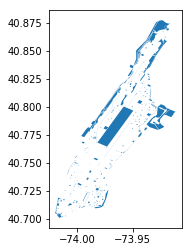

In [33]:
parks.plot()

### unary_union

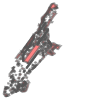

In [34]:
# unary_union
# http://geopandas.org/geometric_manipulations.html
parks_union = parks.unary_union
parks_union

### Level of parks

In [35]:
print(len(parks['typecatego'].unique()))
parks['typecatego'].unique()

17


array(['Community Park', 'Garden', 'Triangle/Plaza', 'Playground',
       'Jointly Operated Playground', 'Mall', 'Neighborhood Park',
       'Managed Sites', 'Recreation Field/Courts', 'Parkway',
       'Flagship Park', 'Buildings/Institutions', 'Strip', 'Nature Area',
       'Waterfront Facility', 'Historic House Park', 'Undeveloped'],
      dtype=object)

In [36]:
park_level = {
        'Community Park': 2, 
        'Garden': 2, 
        'Triangle/Plaza': 2, 
        'Playground': 2,
        'Jointly Operated Playground': 2, 
        'Mall': 1, 
        'Neighborhood Park': 2,
        'Managed Sites': 1, 
        'Recreation Field/Courts': 2, 
        'Parkway': 1,
        'Flagship Park': 3, 
        'Buildings/Institutions': 2, 
        'Strip': 1, 
        'Nature Area': 2,
        'Waterfront Facility': 2, 
        'Historic House Park': 2, 
        'Undeveloped': 1}

In [37]:
parks['level'] = parks['typecatego'].apply(lambda x: park_level[x])

### Calculation

In [38]:
def park_calculation(buffer):
    park_buffer_list = parks[list(map(lambda x: buffer.intersection(x).area != 0, parks.geometry))]    
    park_num = len(park_buffer_list)
    park_area = sum(park_buffer_list['acres'])
    if park_num != 0:
        park_top_level = max(park_buffer_list['level'])
    else:
        park_top_level = 0
        
    return park_num, park_area, park_top_level

In [39]:
park_num_list, park_area_list, park_top_level_list = [], [], []
for i in range(len(BBL_centroid_buffer)):
    if i%10000 == 0:
        print('processing percentage: {:.2%}'.format(i/len(BBL_centroid_buffer)))
    park_num, park_area, park_top_level = park_calculation(BBL_centroid_buffer[i])
    park_num_list.append(park_num)
    park_area_list.append(park_area)
    park_top_level_list.append(park_top_level)

processing percentage: 0.00%
processing percentage: 21.93%
processing percentage: 43.87%
processing percentage: 65.80%
processing percentage: 87.74%


#### Min distance

Intersection  
http://geopandas.org/geometric_manipulations.html

In [40]:
# http://geopandas.org/reference.html
park_distance_list = BBL_centroid.distance(parks_union)

### Write into df

In [41]:
df['park_num'] = park_num_list
df['park_area'] = park_area_list
df['park_top_level'] = park_top_level_list
df['park_distance'] = park_distance_list
print(df.shape)
df.head()

(45590, 70)


,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,distance_subway,distance_bus,park_num,park_area,park_top_level,park_distance
0,1008870001,1018457.0,1935.0,584238.0,2100.0,Photogramm,37.0,155.490000,2017-08-22,00:00:00.000,...,5.8,2.3,0.0,6.7,0.000431,0.001354,1,0.650,1,0.002217
1,1013490035,1039988.0,1931.0,66240.0,2100.0,Photogramm,52.0,167.214468,2017-08-22,00:00:00.000,...,6.0,8.6,0.0,4.0,0.003997,0.000763,5,3.002,2,0.001857
2,1021210037,1062896.0,1910.0,708881.0,2100.0,Photogramm,154.0,59.722628,2017-08-22,00:00:00.000,...,12.9,11.4,2.3,18.4,0.002309,0.000256,8,181.295,2,0.000263
3,1017730020,1087605.0,1998.0,869430.0,2100.0,Photogramm,18.0,47.625370,2017-08-22,00:00:00.000,...,12.4,3.3,0.0,9.2,0.000695,0.000475,12,13.251,2,0.001331
4,1005040036,1007814.0,1920.0,263088.0,2100.0,Photogramm,19.0,74.860000,2017-08-22,00:00:00.000,...,5.2,12.9,0.0,5.0,0.000466,0.000588,7,2.092,2,0.000272


## Crime
http://geopandas.org/reference/geopandas.sjoin.html

In [42]:
if not os.path.isfile("data/crime.csv"):
    ! curl https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD > data/crime.csv
else:
    print("file in place, you can continue")

file in place, you can continue


In [43]:
crime = pd.read_csv("data/crime.csv", usecols = ['BORO_NM', 'LAW_CAT_CD','Latitude', 'Longitude'])
crime = crime[crime['BORO_NM']=='MANHATTAN']
crime['lonlat']=list(zip(crime.Longitude,crime.Latitude))
crime['geometry']=crime[['lonlat']].applymap(lambda x:Point(x))
crime = gpd.GeoDataFrame(crime[['LAW_CAT_CD', 'geometry']])
print(crime.shape)
crime.head()

(114675, 2)


,LAW_CAT_CD,geometry
1,FELONY,POINT (-73.98694954399997 40.75604353500006)
4,MISDEMEANOR,POINT (-73.99309646799998 40.72151233500005)
7,FELONY,POINT (-73.95929788799998 40.81409369900008)
19,MISDEMEANOR,POINT (-73.98287468799998 40.72697059300003)
34,VIOLATION,POINT (-73.96844369899995 40.79415338600006)


crime.plot()

In [44]:
%%time
BBL_crime = gpd.sjoin(BBL_centroid_buffer_gpd, crime, how='left')
print(BBL_crime.shape)

(53462737, 3)
CPU times: user 8min 51s, sys: 32.5 s, total: 9min 23s
Wall time: 14min 2s


In [45]:
BBL_crime = BBL_crime.reset_index()
BBL_crime = BBL_crime[['index', 'LAW_CAT_CD']]
BBL_crime.head()

,index,LAW_CAT_CD
0,0,FELONY
1,0,FELONY
2,0,FELONY
3,0,FELONY
4,0,VIOLATION


In [46]:
BBL_crime_FELONY = BBL_crime[BBL_crime['LAW_CAT_CD']=='FELONY']
BBL_crime_FELONY = BBL_crime_FELONY.groupby('index').count()
BBL_crime_FELONY.columns = ['FELONY']
df = pd.merge(df, BBL_crime_FELONY, left_index=True, right_index=True, how='left')

In [47]:
BBL_crime_VIOLATION = BBL_crime[BBL_crime['LAW_CAT_CD']=='VIOLATION']
BBL_crime_VIOLATION = BBL_crime_VIOLATION.groupby('index').count()
BBL_crime_VIOLATION.columns = ['VIOLATION']
df = pd.merge(df, BBL_crime_VIOLATION, left_index=True, right_index=True, how='left')

In [48]:
BBL_crime_MISDEMEANOR = BBL_crime[BBL_crime['LAW_CAT_CD']=='MISDEMEANOR']
BBL_crime_MISDEMEANOR = BBL_crime_MISDEMEANOR.groupby('index').count()
BBL_crime_MISDEMEANOR.columns = ['MISDEMEANOR']
df = pd.merge(df, BBL_crime_MISDEMEANOR, left_index=True, right_index=True, how='left')

In [49]:
print(df.shape)
df.head()

(45590, 73)


,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,...,Unemployment,distance_subway,distance_bus,park_num,park_area,park_top_level,park_distance,FELONY,VIOLATION,MISDEMEANOR
0,1008870001,1018457.0,1935.0,584238.0,2100.0,Photogramm,37.0,155.490000,2017-08-22,00:00:00.000,...,6.7,0.000431,0.001354,1,0.650,1,0.002217,469.0,134.0,741.0
1,1013490035,1039988.0,1931.0,66240.0,2100.0,Photogramm,52.0,167.214468,2017-08-22,00:00:00.000,...,4.0,0.003997,0.000763,5,3.002,2,0.001857,269.0,107.0,344.0
2,1021210037,1062896.0,1910.0,708881.0,2100.0,Photogramm,154.0,59.722628,2017-08-22,00:00:00.000,...,18.4,0.002309,0.000256,8,181.295,2,0.000263,322.0,169.0,743.0
3,1017730020,1087605.0,1998.0,869430.0,2100.0,Photogramm,18.0,47.625370,2017-08-22,00:00:00.000,...,9.2,0.000695,0.000475,12,13.251,2,0.001331,742.0,209.0,1251.0
4,1005040036,1007814.0,1920.0,263088.0,2100.0,Photogramm,19.0,74.860000,2017-08-22,00:00:00.000,...,5.0,0.000466,0.000588,7,2.092,2,0.000272,330.0,103.0,479.0


## output

In [51]:
df.columns

Index(['base_bbl', 'bin', 'cnstrct_yr', 'doitt_id', 'feat_code', 'geomsource',
       'groundelev', 'heightroof', 'date_lstmo', 'time_lstmo', 'lststatype',
       'mpluto_bbl', 'name', 'shape_area_x', 'shape_len', 'geometry',
       'borough', 'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil',
       'ct2010', 'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area_y',
       'shape_leng', 'CensusTract', 'County', 'Borough', 'TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'distance_subway',
       'distance_bus', 'park_num', 'park_area', 'park_top_level',
       'park_distance', 'FELONY', 

In [52]:
pd.DataFrame(df).drop(['geometry', 'shape_area_x', 'shape_len', \
                       'borough', 'boro_code', 'boro_name', 'shape_area_y',\
                       'shape_leng', 'County', 'Borough'], axis=1).to_csv('data/output.csv')

## SAT

### SAT

In [ ]:
if not os.path.isfile("data/sat.csv"):
    ! curl https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD > data/sat.csv
else:
    print("file in place, you can continue")

In [ ]:
sat = pd.read_csv("data/sat.csv")
print(sat.shape)
sat.head()

### School distrct

In [ ]:
if not os.path.isfile("data/school_distrct.zip"):
    url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nysd_19a.zip'
    urllib.request.urlretrieve(url, "school_distrct.zip")
    ! mv school_distrct.zip data
    ! unzip -o data/school_distrct.zip -d data/school_distrct
else:
    print("file in place, you can continue")

In [ ]:
filename = ! ls data/school_distrct/nysd_19a | grep .shp
school_distrct = gpd.GeoDataFrame.from_file('data/school_distrct/nysd_19a/' + filename[0])
print(school_distrct.shape)
school_distrct.head()

In [ ]:
school_distrct.plot()

## Google POI
https://developers.google.com/places/web-service/supported_types

In [ ]:
if not os.path.isfile("data/poi.zip"):
    url = 'https://github.com/JunjieTsai/MLC2019_Project/raw/master/data/poi/poi.zip'
    urllib.request.urlretrieve(url, "poi.zip")
    !mv poi.zip data
    !unzip -o data/poi.zip -d data/poi
else:
    print("file in place, you can continue")

In [ ]:
filename = ! ls data/poi | grep .csv
filename

In [ ]:
pd.read_csv?

In [ ]:
poi = pd.read_csv('data/poi/' + "ConvenienceStoreDroppedDuplicates" + ".csv", usecols=['lat', 'lon'])
poi = gpd.GeoDataFrame(poi, geometry=[Point(xy) for xy in zip(poi.lon, poi.lat)])
print(poi.shape)
poi.head()

In [ ]:
# Point in Polygon
# https://automating-gis-processes.github.io/2016/Lesson3-point-in-polygon.html

poi_list = pd.DataFrame(poi.geometry.within(CensusTracts_union))
poi_list = list(poi_list[poi_list[0]==True].index)
poi = poi.iloc[poi_list,]

In [ ]:
CensusTracts_union

In [ ]:
poi.plot()

In [ ]:
poi.plot()